# This script processes the sycl results of the minRadius and maxNumber studies

1. Compile parallelgpu using stage1tbbrem :
```
make bin/parallelgpu
```
2. Run the benchmarking script
```
cd scripts
python3 run_sycl_minradius
```
3. The output that we will process is owm_sycl_coffee.csv



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename, type='minRadius'):
    results ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            name=tokens[0].split("/")[3][:-5]
            nth=int(tokens[1])
            if type == 'minRadius':
                minRad = float(tokens[2])
            else:
                minRad = int(tokens[3])
            if name not in results:
                results[name]={}
            if minRad not in results[name]:
                results[name][minRad]={}
            results[name][minRad][nth]=[float(tokens[5])] # tree construction time
            results[name][minRad][nth].append(float(tokens[6])) # tree copy time
            results[name][minRad][nth].append(float(tokens[7])) # owm time
            results[name][minRad][nth].append(float(tokens[11])) # accuracy

    #print(results)

    return results

res1=tokenize("owm_sycl_coffee.csv","minRadius")

#print(results)



In [44]:
#For the best minRadius (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res1,[0.7,0.3,0.2,0.1]):
    accuracy=[res1[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.72\% & 99.85\%\\ \hline
Arzua & 99.01\% & 99.11\%\\ \hline
BrionF & 99.17\% & 99.46\%\\ \hline
BrionU & 99.12\% & 99.24\%\\ \hline


In [45]:
for i in res1:
    times=[res1[i][j][1][2] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has sequential OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][1][2] ))
    print("Cloud {} with best minRadius {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][1][2]/mintime))


Cloud Alcoy with baseline minRadius 0.1 has sequential OWM time = 1.87
Cloud Alcoy with best minRadius 0.7 has sequential OWM best time (speedup) = 0.90 (2.07x)
Cloud Arzua with baseline minRadius 0.1 has sequential OWM time = 1.32
Cloud Arzua with best minRadius 0.3 has sequential OWM best time (speedup) = 0.93 (1.41x)
Cloud BrionF with baseline minRadius 0.1 has sequential OWM time = 0.45
Cloud BrionF with best minRadius 0.2 has sequential OWM best time (speedup) = 0.44 (1.01x)
Cloud BrionU with baseline minRadius 0.1 has sequential OWM time = 0.48
Cloud BrionU with best minRadius 0.1 has sequential OWM best time (speedup) = 0.48 (1.00x)


In [46]:
for i in res1:
    times=[res1[i][j][8][2] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline minRadius {:.1f} has 8-core OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][0.1][8][2] ))
    print("Cloud {} with best minRadius {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,res1[i][0.1][8][2]/mintime))


Cloud Alcoy with baseline minRadius 0.1 has 8-core OWM time = 0.36
Cloud Alcoy with best minRadius 0.9 has 8-core OWM best time (speedup) = 0.19 (1.96x)
Cloud Arzua with baseline minRadius 0.1 has 8-core OWM time = 0.26
Cloud Arzua with best minRadius 0.4 has 8-core OWM best time (speedup) = 0.18 (1.41x)
Cloud BrionF with baseline minRadius 0.1 has 8-core OWM time = 0.10
Cloud BrionF with best minRadius 0.1 has 8-core OWM best time (speedup) = 0.10 (1.00x)
Cloud BrionU with baseline minRadius 0.1 has 8-core OWM time = 0.11
Cloud BrionU with best minRadius 0.1 has 8-core OWM best time (speedup) = 0.11 (1.00x)


In [47]:
for i in res1:
    times=[res1[i][j][1][0] for j in res1[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime ))


Cloud Alcoy with minRadius 2.0 has qtree creation best time = 0.66
Cloud Arzua with minRadius 2.0 has qtree creation best time = 1.23
Cloud BrionF with minRadius 1.6 has qtree creation best time = 2.40
Cloud BrionU with minRadius 1.8 has qtree creation best time = 2.71


In [48]:
for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][1]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res1[i][0.1][8][0]+res1[i][0.1][8][1]+res1[i][0.1][8][2]
    print("Cloud {} with baseline minRadius {:.1f} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res1[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 2.50
Cloud Alcoy with best minRadius 1.4 has total (8-core owm + qtree creation) best time (speedup) = 0.47 (5.34x)
Cloud Arzua with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 2.07
Cloud Arzua with best minRadius 0.5 has total (8-core owm + qtree creation) best time (speedup) = 0.70 (2.98x)
Cloud BrionF with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 1.71
Cloud BrionF with best minRadius 0.6 has total (8-core owm + qtree creation) best time (speedup) = 1.13 (1.52x)
Cloud BrionU with baseline minRadius 0.1 has total (8-core owm + qtree creation) time = 1.82
Cloud BrionU with best minRadius 0.6 has total (8-core owm + qtree creation) best time (speedup) = 1.28 (1.42x)


# Execution time for each cloud with sycl version depending on minRadius

In [ ]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0]+results[cloudname][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MinRadius', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('Alcoy',1,res1)
plot_cloudtime('Alcoy',8,res1)
plot_cloudtime('Arzua',1,res1)
plot_cloudtime('Arzua',8,res1)
plot_cloudtime('BrionF',1,res1)
plot_cloudtime('BrionF',8,res1)
plot_cloudtime('BrionU',1,res1)
plot_cloudtime('BrionU',8,res1)

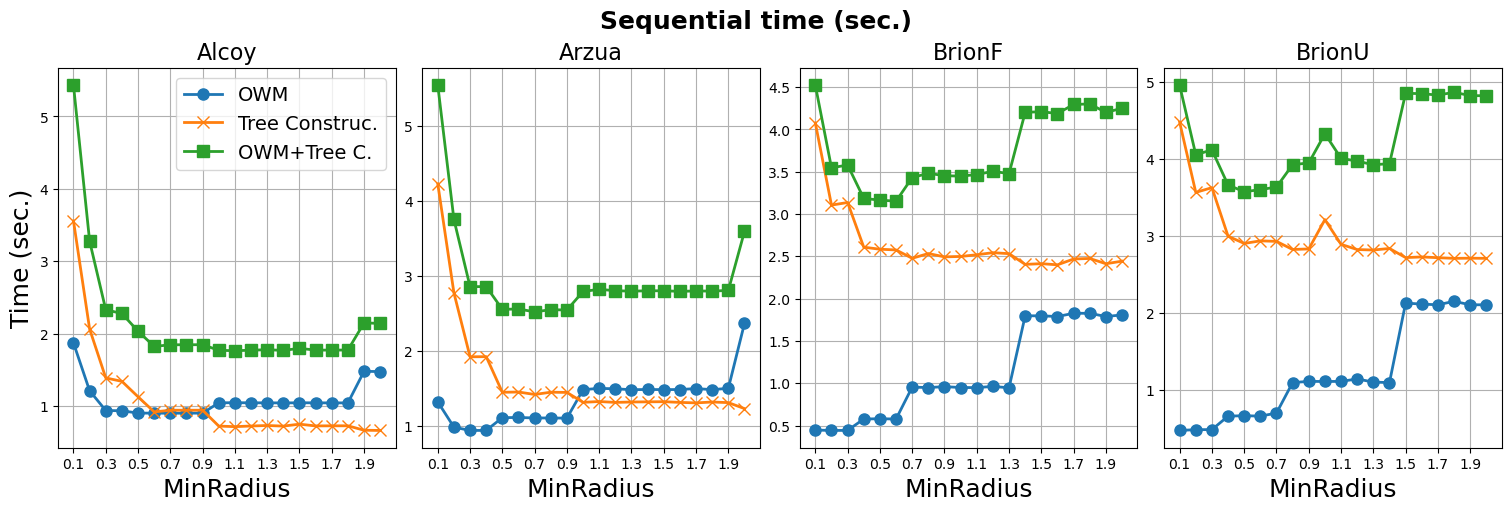

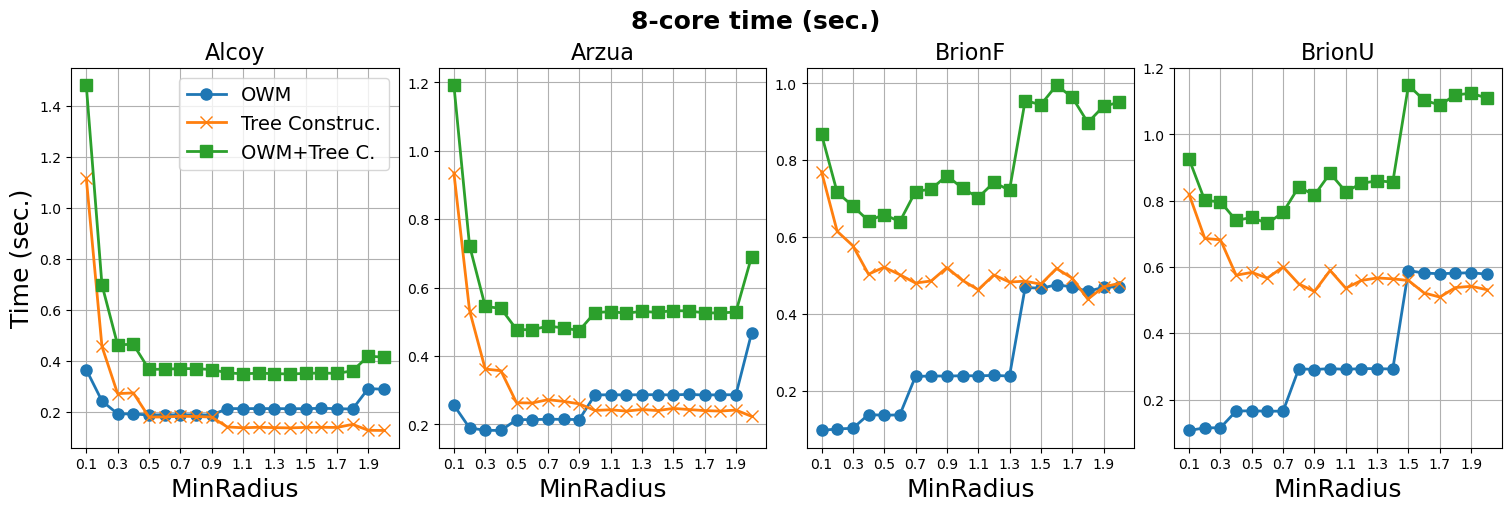

In [49]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Construc.','OWM+Tree C.']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0]+results[name][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    if nth==1:
        pp = PdfPages("MinRadSeqMemoLev.pdf")
    else:
        pp = PdfPages("MinRad8coresMemoLev.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()

plot_alltimes(1,res1)

plot_alltimes(8,res1)


# Speed up (using total time) for the best minRadius (for total time, that are [1.4,0.5,0.6,0.6])

[1.         1.85063372 2.82929209 4.09888786 5.32067551]
[1.         1.87791907 2.8607852  4.18718628 5.48341245]
[1.         1.88661931 2.99087548 4.14804798 5.12418065]
[1.         1.90768055 3.03125319 4.35418824 5.18811465]
[1.         1.84245667 2.65180124 3.86452126 4.93912805]
[1.         1.85147079 2.78128287 4.0145216  5.16254303]
[1.         1.83179174 2.66707379 3.61394183 4.17484503]
[1.         1.83871218 2.56432219 3.57672922 4.03592607]
[1.         1.85063372 2.82929209 4.09888786 5.32067551]
[1.         1.87791907 2.8607852  4.18718628 5.48341245]
[1.         1.88661931 2.99087548 4.14804798 5.12418065]
[1.         1.90768055 3.03125319 4.35418824 5.18811465]


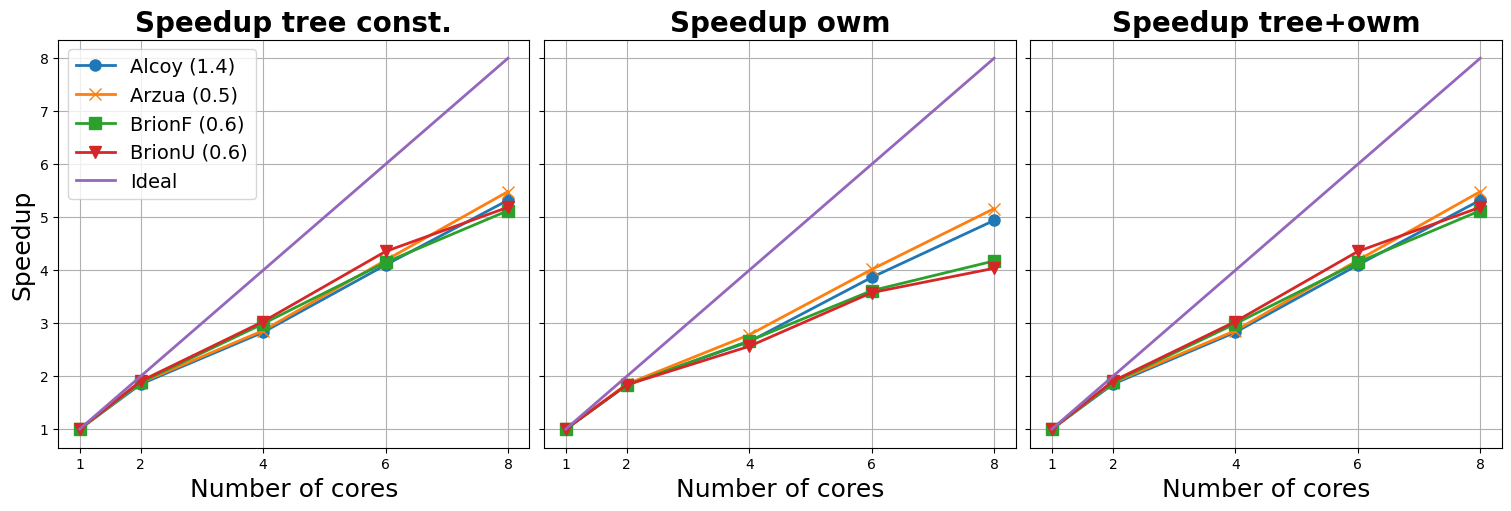

In [50]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

marks=['o-','x-','s-','v-','+-']
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)

for (i,z,k) in zip(res1,marks,[1.4,0.5,0.6,0.6]):
    print(np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]))
    axs[0].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[0].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[1.4,0.5,0.6,0.6]):
    print(np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]))
    axs[1].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[1].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[1.4,0.5,0.6,0.6]):
    print(np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]))
    axs[2].plot(np.array([1,2,4,6,8]), np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[2].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=['Alcoy (1.4)', 'Arzua (0.5)', 'BrionF (0.6)', 'BrionU (0.6)']
sizes.append('Ideal')
axs[0].legend(sizes,loc='best', fontsize= legendfs)
axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
axs[0].set_title('Speedup tree const.',  fontweight='bold', fontsize=titlefs)
axs[0].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[0].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[0].grid()
axs[1].set_title('Speedup owm',  fontweight='bold', fontsize=titlefs)
axs[1].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[1].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[1].grid()
axs[2].set_title('Speedup tree+owm',  fontweight='bold', fontsize=titlefs)
axs[2].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[2].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[2].grid()
#plt.yticks(fontsize=yticksfs)

#fig.suptitle('Speedup',fontweight='bold', fontsize=24)

In [35]:

pp = PdfPages("Speedup-minrad.pdf")
pp.savefig(fig)
pp.close()

In [64]:
for i in res1:
    times=[res1[i][j][1][0]+res1[i][j][1][2] for j in res1[i]] #1-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best minRadius {:.1f} has total (1-core owm + qtree creation) best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime))

output="All_Optimizations.out"

f = open(output, "a")

for i in res1:
    times=[res1[i][j][1][0]+res1[i][j][1][2] for j in res1[i]] #1-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Opt3-Memo-MinRad; {}; {:.2f}; {:.2f};".format(i,res1[i][list(res1[i].keys())[minRad]][1][0],res1[i][list(res1[i].keys())[minRad]][1][2]))
    f.write("Opt3-Memo-MinRad; {}; {:.2f}; {:.2f};\n".format(i,res1[i][list(res1[i].keys())[minRad]][1][0],res1[i][list(res1[i].keys())[minRad]][1][2]))

f.close()

Cloud Alcoy with best minRadius 1.1 has total (1-core owm + qtree creation) best time = 1.77
Cloud Arzua with best minRadius 0.7 has total (1-core owm + qtree creation) best time = 2.52
Cloud BrionF with best minRadius 0.6 has total (1-core owm + qtree creation) best time = 3.15
Cloud BrionU with best minRadius 0.5 has total (1-core owm + qtree creation) best time = 3.58
Opt3-Memo-MinRad; Alcoy; 0.72; 1.05;
Opt3-Memo-MinRad; Arzua; 1.41; 1.10;
Opt3-Memo-MinRad; BrionF; 2.58; 0.58;
Opt3-Memo-MinRad; BrionU; 2.91; 0.67;


# Now processes the sycl results of the maxnumber study 

1. Compile parallelmaxnum using stage1tbbrem:
```
make bin/parallelmaxnum
```
2. Run the benchmarking script
```
cd scripts
python3 run_sycl_maxnumber
```
3. The output that we will process is owm_syclmaxnum_coffee.csv



In [65]:
res2=tokenize("owm_syclmaxnum_coffee.csv",'maxNumber')

#print(results)
#For the best maxNumber (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res2,[64,64,64,64]):
    accuracy=[res2[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.33\% & 99.85\%\\ \hline
Arzua & 99.02\% & 99.10\%\\ \hline
BrionF & 99.20\% & 99.46\%\\ \hline
BrionU & 99.10\% & 99.24\%\\ \hline


In [66]:

for i in res2:
    times=[res2[i][j][1][2] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline maxNumber {} has sequential OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][1][2] ))
    print("Cloud {} with best maxNumber {} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][32][1][2]/mintime))


Cloud Alcoy with baseline maxNumber 32 has sequential OWM time = 0.95
Cloud Alcoy with best maxNumber 64 has sequential OWM best time (speedup) = 0.94 (1.01x)
Cloud Arzua with baseline maxNumber 32 has sequential OWM time = 0.98
Cloud Arzua with best maxNumber 64 has sequential OWM best time (speedup) = 0.96 (1.02x)
Cloud BrionF with baseline maxNumber 32 has sequential OWM time = 0.47
Cloud BrionF with best maxNumber 64 has sequential OWM best time (speedup) = 0.45 (1.05x)
Cloud BrionU with baseline maxNumber 32 has sequential OWM time = 0.52
Cloud BrionU with best maxNumber 64 has sequential OWM best time (speedup) = 0.48 (1.08x)


In [67]:
for i in res2:
    times=[res2[i][j][8][2] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with baseline maxNumber {} has 8-core OWM time = {:.2f}".format(i,list(res2[i].keys())[0],res2[i][32][8][2] ))
    print("Cloud {} with best maxNumber {} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,res2[i][32][8][2]/mintime))


Cloud Alcoy with baseline maxNumber 32 has 8-core OWM time = 0.19
Cloud Alcoy with best maxNumber 64 has 8-core OWM best time (speedup) = 0.19 (1.01x)
Cloud Arzua with baseline maxNumber 32 has 8-core OWM time = 0.19
Cloud Arzua with best maxNumber 64 has 8-core OWM best time (speedup) = 0.18 (1.02x)
Cloud BrionF with baseline maxNumber 32 has 8-core OWM time = 0.10
Cloud BrionF with best maxNumber 64 has 8-core OWM best time (speedup) = 0.10 (1.04x)
Cloud BrionU with baseline maxNumber 32 has 8-core OWM time = 0.11
Cloud BrionU with best maxNumber 64 has 8-core OWM best time (speedup) = 0.11 (1.05x)


In [68]:

for i in res2:
    times=[res2[i][j][1][0] for j in res2[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with maxNumber {} has qtree creation best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime ))


Cloud Alcoy with maxNumber 32768 has qtree creation best time = 0.70
Cloud Arzua with maxNumber 65536 has qtree creation best time = 1.38
Cloud BrionF with maxNumber 65536 has qtree creation best time = 2.98
Cloud BrionU with maxNumber 65536 has qtree creation best time = 3.39


In [69]:

for i in res2:
    times=[res2[i][j][1][0]+res2[i][j][1][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    baselinetotaltime=res2[i][32][1][0]+res2[i][32][8][2]
    print("Cloud {} with baseline maxNumber {} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res2[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best maxNumber {} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res2[i].keys())[minRad],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 1.94
Cloud Alcoy with best maxNumber 256 has total (8-core owm + qtree creation) best time (speedup) = 2.17 (0.89x)
Cloud Arzua with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 3.58
Cloud Arzua with best maxNumber 512 has total (8-core owm + qtree creation) best time (speedup) = 3.27 (1.10x)
Cloud BrionF with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 5.28
Cloud BrionF with best maxNumber 512 has total (8-core owm + qtree creation) best time (speedup) = 4.39 (1.20x)
Cloud BrionU with baseline maxNumber 32 has total (8-core owm + qtree creation) time = 6.11
Cloud BrionU with best maxNumber 512 has total (8-core owm + qtree creation) best time (speedup) = 5.10 (1.20x)


In [ ]:

# Execution time for each cloud with tfm/parallelcpp version depending on minRadius
import matplotlib.pyplot as plt
def plot_cloudmaxnum(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()

    xticks=range(1,len(x)+1)

    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(xticks), np.array([results[cloudname][i][nth][0]+results[cloudname][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MaxNumber', fontsize=xlabelfs)

    plt.xticks(ticks=xticks[::2], labels=x[::2], fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudmaxnum('Alcoy',1,res2)
plot_cloudmaxnum('Alcoy',8,res2)
plot_cloudmaxnum('Arzua',1,res2)
plot_cloudmaxnum('Arzua',8,res2)
plot_cloudmaxnum('BrionF',1,res2)
plot_cloudmaxnum('BrionF',8,res2)
plot_cloudmaxnum('BrionU',1,res2)
plot_cloudmaxnum('BrionU',8,res2)


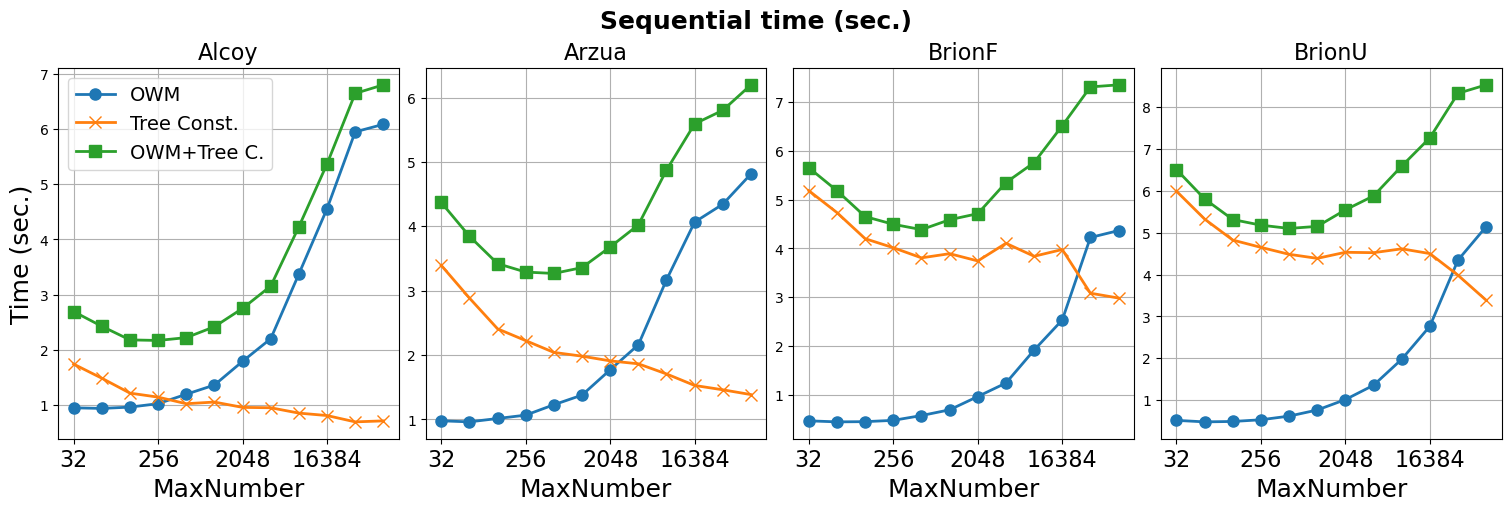

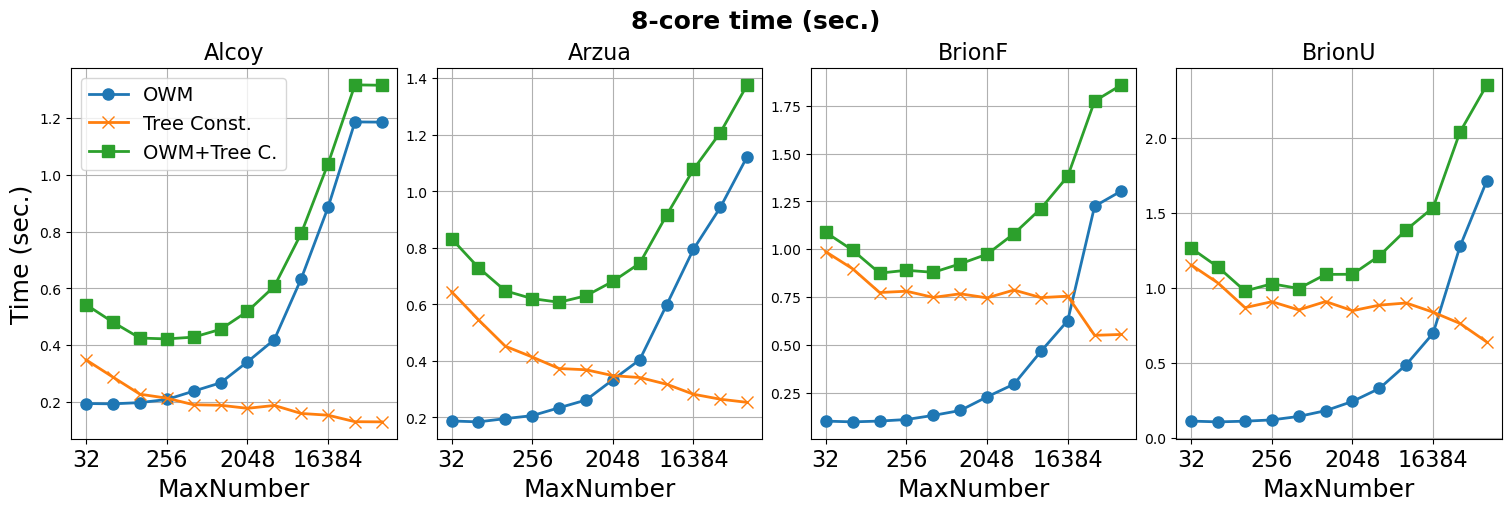

In [56]:

def plot_allmaxnum(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Const.','OWM+Tree C.']
    x=list(results['Alcoy'].keys())
    xticks=range(1,len(x)+1)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):

        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(xticks), np.array([results[name][i][nth][0]+results[name][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)

        axs[i].set_xlabel('MaxNumber', fontsize=xlabelfs)
        axs[i].set_xticks(ticks=xticks[::3], labels=x[::3],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    if nth==1:
        pp = PdfPages("MaxNumSeqMemoLev.pdf")
    else:
        pp = PdfPages("MaxNum8coresMemoLev.pdf")
    pp.savefig(fig)
    pp.close()
    #axs[i].show()

plot_allmaxnum(1,res2)
plot_allmaxnum(8,res2)


[1.         1.89167745 2.81072868 4.12197881 5.36188329]
[1.         1.89806503 2.85475528 4.16782421 5.46722599]
[1.         1.86455745 2.86665256 4.15713571 5.09073006]
[1.         1.88311479 2.95879226 4.11947489 5.25123141]
[1.         1.83772242 2.63834646 3.823219   4.91318174]
[1.         1.88343857 2.80257379 4.00890194 5.23575415]
[1.         1.85108222 2.6518265  3.64642661 4.40930169]
[1.         1.83039256 2.67978814 3.65131579 4.32756111]
[1.         1.89167745 2.81072868 4.12197881 5.36188329]
[1.         1.89806503 2.85475528 4.16782421 5.46722599]
[1.         1.86455745 2.86665256 4.15713571 5.09073006]
[1.         1.88311479 2.95879226 4.11947489 5.25123141]


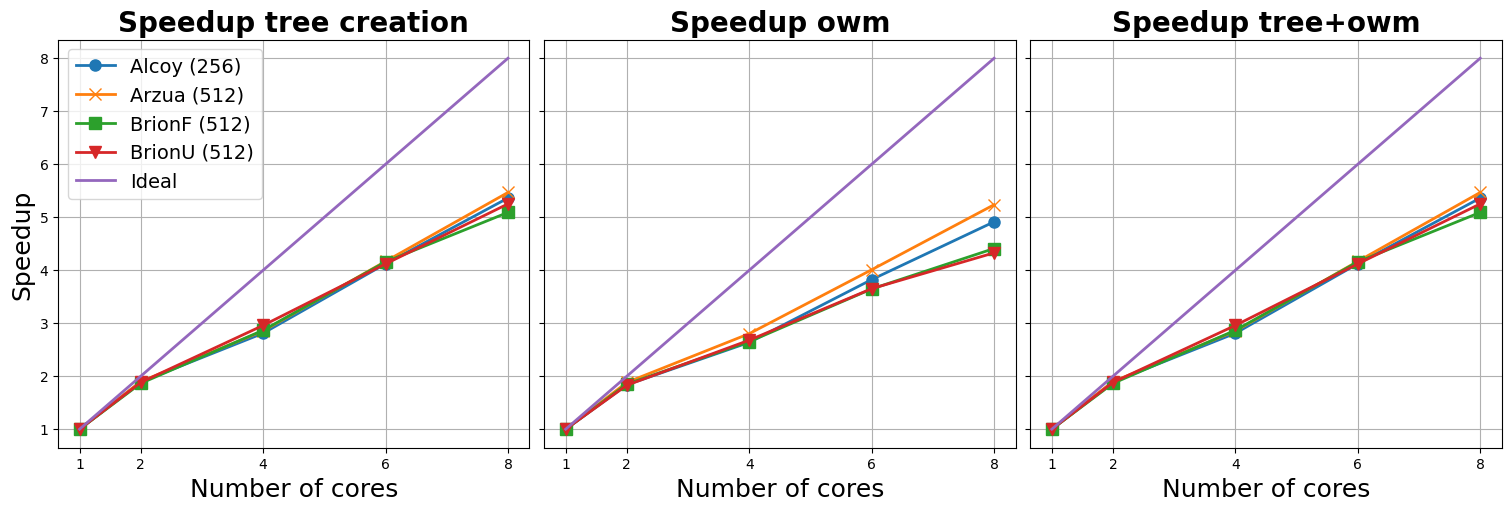

In [74]:
# Speed up (using total time) for the best maxNumber (for total time, that are [256,512,512,512])
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

marks=['o-','x-','s-','v-','+-']

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)

for (i,z,k) in zip(res2,marks,[256,512,512,512]):
    print(np.array([res2[i][k][1][0]/res2[i][k][j][0] for j in [1,2,4,6,8]]))
    axs[0].plot(np.array([1,2,4,6,8]), np.array([res2[i][k][1][0]/res2[i][k][j][0] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[0].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res2,marks,[256,512,512,512]):
    print(np.array([res2[i][k][1][2]/res2[i][k][j][2] for j in [1,2,4,6,8]]))
    axs[1].plot(np.array([1,2,4,6,8]), np.array([res2[i][k][1][2]/res2[i][k][j][2] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[1].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res2,marks,[256,512,512,512]):
    print(np.array([sum(res2[i][k][1][0:2:2])/sum(res2[i][k][j][0:2:2]) for j in [1,2,4,6,8]]))
    axs[2].plot(np.array([1,2,4,6,8]), np.array([sum(res2[i][k][1][0:2:2])/sum(res2[i][k][j][0:2:2]) for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[2].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=['Alcoy (256)', 'Arzua (512)', 'BrionF (512)', 'BrionU (512)']
sizes.append('Ideal')
axs[0].legend(sizes,loc='best', fontsize= legendfs)
axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
axs[0].set_title('Speedup tree creation',  fontweight='bold', fontsize=titlefs)
axs[0].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[0].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[0].grid()
axs[1].set_title('Speedup owm',  fontweight='bold', fontsize=titlefs)
axs[1].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[1].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[1].grid()
axs[2].set_title('Speedup tree+owm',  fontweight='bold', fontsize=titlefs)
axs[2].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[2].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[2].grid()

In [75]:
pp = PdfPages("Speedup-maxnum.pdf")
pp.savefig(fig)
pp.close()

In [71]:
for i in res2:
    times=[res2[i][j][1][0]+res2[i][j][1][2] for j in res2[i]] #1-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best maxNumber {:.1f} has total (1-core owm + qtree creation) best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime))

output="All_Optimizations.out"

f = open(output, "a")

for i in res2:
    times=[res2[i][j][1][0]+res2[i][j][1][2] for j in res2[i]] #1-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Opt3-Memo-MaxNum; {}; {:.2f}; {:.2f};".format(i,res2[i][list(res2[i].keys())[minRad]][1][0],res2[i][list(res2[i].keys())[minRad]][1][2]))
    f.write("Opt3-Memo-MaxNum; {}; {:.2f}; {:.2f};\n".format(i,res2[i][list(res2[i].keys())[minRad]][1][0],res2[i][list(res2[i].keys())[minRad]][1][2]))

f.close()

Cloud Alcoy with best maxNumber 256.0 has total (1-core owm + qtree creation) best time = 2.17
Cloud Arzua with best maxNumber 512.0 has total (1-core owm + qtree creation) best time = 3.27
Cloud BrionF with best maxNumber 512.0 has total (1-core owm + qtree creation) best time = 4.39
Cloud BrionU with best maxNumber 512.0 has total (1-core owm + qtree creation) best time = 5.10
Opt3-Memo-MaxNum; Alcoy; 1.14; 1.03;
Opt3-Memo-MaxNum; Arzua; 2.04; 1.23;
Opt3-Memo-MaxNum; BrionF; 3.81; 0.58;
Opt3-Memo-MaxNum; BrionU; 4.49; 0.62;


# Add final parallel (8-cores) times to All_Optimizations.out

In [73]:
for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime))

for i in res2:
    times=[res2[i][j][8][0]+res2[i][j][8][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best maxNumber {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime))


output="All_Optimizations.out"

f = open(output, "a")

for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Par8cores-Memo-MinRad; {}; {:.2f}; {:.2f};".format(i,res1[i][list(res1[i].keys())[minRad]][8][0],res1[i][list(res1[i].keys())[minRad]][8][2]))
    f.write("Par8cores-Memo-MinRad; {}; {:.2f}; {:.2f};\n".format(i,res1[i][list(res1[i].keys())[minRad]][8][0],res1[i][list(res1[i].keys())[minRad]][8][2]))

for i in res2:
    times=[res2[i][j][8][0]+res2[i][j][8][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Par8cores-Memo-MaxNum; {}; {:.2f}; {:.2f};".format(i,res2[i][list(res2[i].keys())[minRad]][8][0],res2[i][list(res2[i].keys())[minRad]][8][2]))
    f.write("Par8cores-Memo-MaxNum; {}; {:.2f}; {:.2f};\n".format(i,res2[i][list(res2[i].keys())[minRad]][8][0],res2[i][list(res2[i].keys())[minRad]][8][2]))


f.close()

Cloud Alcoy with best minRadius 1.4 has total (8-core owm + qtree creation) best time = 0.35
Cloud Arzua with best minRadius 0.9 has total (8-core owm + qtree creation) best time = 0.47
Cloud BrionF with best minRadius 0.6 has total (8-core owm + qtree creation) best time = 0.64
Cloud BrionU with best minRadius 0.6 has total (8-core owm + qtree creation) best time = 0.73
Cloud Alcoy with best maxNumber 256.0 has total (8-core owm + qtree creation) best time = 0.42
Cloud Arzua with best maxNumber 512.0 has total (8-core owm + qtree creation) best time = 0.61
Cloud BrionF with best maxNumber 128.0 has total (8-core owm + qtree creation) best time = 0.87
Cloud BrionU with best maxNumber 128.0 has total (8-core owm + qtree creation) best time = 0.98
Par8cores-Memo-MinRad; Alcoy; 0.14; 0.21;
Par8cores-Memo-MinRad; Arzua; 0.26; 0.21;
Par8cores-Memo-MinRad; BrionF; 0.50; 0.14;
Par8cores-Memo-MinRad; BrionU; 0.57; 0.16;
Par8cores-Memo-MaxNum; Alcoy; 0.21; 0.21;
Par8cores-Memo-MaxNum; Arzua; 0.